In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv('NFL_2019_RegularSzn_PlayByPlay_Github.csv', low_memory=False)
df.head(200)

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_player_name,as

In [34]:
cols = ['game_id', 'play_id', 'game_date', 'home_team', 'away_team', 'total_home_score', 'total_away_score', 'side_of_field', 'game_half', 'yardline_100', 'time', 'game_seconds_remaining', 'drive', 'qtr', 'down', 'ydstogo', 'play_type', 'desc', 'yards_gained', 'posteam_score', 'defteam_score', 'score_differential', 'wp', 'home_wp', 'away_wp', 'posteam', 'posteam_type']
df_reduce = df[cols]
df_reduce.loc[:, 'home_wp'] = df_reduce['home_wp'].fillna(0.50)
df_reduce.loc[:, 'away_wp'] = df_reduce['away_wp'].fillna(0.50)
df_reduce.loc[:, 'wp'] = df_reduce['wp'].fillna(50)
df_reduce['home_wp_change'] = df_reduce.loc[:, 'home_wp'].diff().fillna(0)
df_reduce['away_wp_change'] = df_reduce.loc[:, 'away_wp'].diff().fillna(0)
df_reduce.loc[:, 'down'] = df_reduce['down'].fillna(0)
df_reduce.loc[:, 'posteam_score'] = df_reduce['posteam_score'].fillna(0)
df_reduce.loc[:, 'defteam_score'] = df_reduce['defteam_score'].fillna(0)
df_reduce.loc[:, 'score_differential'] = df_reduce['score_differential'].fillna(0)

C:\Users\seanz\AppData\Local\Temp\ipykernel_8472\1052317286.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduce['home_wp_change'] = df_reduce.loc[:, 'home_wp'].diff().fillna(0)
C:\Users\seanz\AppData\Local\Temp\ipykernel_8472\1052317286.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduce['away_wp_change'] = df_reduce.loc[:, 'away_wp'].diff().fillna(0)


# Win Probability Model - from github NFLScrapR 
# https://github.com/ryurko/nflscrapR-data/blob/master/README.md
# General Additive Model used - ESPN model uses a generalized linear model


In [27]:
df_reduce.head(200)

,play_id,game_id,home_team,away_team,game_date,posteam,posteam_type,yardline_100,game_seconds_remaining,qtr,down,ydstogo,play_type,yards_gained,desc,posteam_score,defteam_score,score_differential,total_away_score,total_home_score,wp,home_wp,away_wp,home_wp_change,away_wp_change
0,35,2019090500,CHI,GB,2019-09-05,GB,away,35.0,3600.0,1,0.0,0,kickoff,0,E.Pineiro kicks 65 yards from CHI 35 to end zo...,0.0,0.0,0.0,0,0,50.000000,0.500000,0.500000,0.000000,0.000000
1,50,2019090500,CHI,GB,2019-09-05,GB,away,75.0,3600.0,1,1.0,10,run,0,(15:00) A.Jones left tackle to GB 25 for no ga...,0.0,0.0,0.0,0,0,0.500007,0.499993,0.500007,-0.000007,0.000007
2,71,2019090500,CHI,GB,2019-09-05,GB,away,75.0,3573.0,1,2.0,10,pass,0,(14:33) A.Rodgers pass short left to A.Jones t...,0.0,0.0,0.0,0,0,0.479346,0.520654,0.479346,0.020660,-0.020660
3,95,2019090500,CHI,GB,2019-09-05,GB,away,75.0,3525.0,1,3.0,10,pass,-10,(13:45) (Shotgun) A.Rodgers sacked at GB 15 fo...,0.0,0.0,0.0,0,0,0.453258,0.546742,0.453258,0.026088,-0.026088
4,125,2019090500,CHI,GB,2019-09-05,GB,away,85.0,3495.0,1,4.0,20,punt,0,(13:15) (Punt formation) J.Scott punts 53 yard...,0.0,0.0,0.0,0,0,0.386327,0.613673,0.386327,0.066931,-0.066931
5,155,2019090500,CHI,GB,2019-09-05,CHI,home,57.0,3481.0,1,1.0,10,no_play,0,(13:01) (Shotgun) T.Cohen FUMBLES (Aborted) at...,0.0,0.0,0.0,0,0,0.556110,0.556110,0.443890,-0.057563,0.057563
6,195,2019090500,CHI,GB,2019-09-05,CHI,home,52.0,3453.0,1,1.0,10,run,5,(12:33) (Shotgun) M.Davis left guard to GB 47 ...,0.0,0.0,0.0,0,0,0.569501,0.569501,0.430499,0.013391,-0.013391
7,216,2019090500,CHI,GB,2019-09-05,CHI,home,47.0,3418.0,1,2.0,5,pass,0,(11:58) (Shotgun) M.Trubisky pass incomplete s...,0.0,0.0,0.0,0,0,0.572831,0.572831,0.427169,0.003330,-0.003330
8,238,2019090500,CHI,GB,2019-09-05,CHI,home,47.0,3414.0,1,3.0,5,run,7,(11:54) (Shotgun) M.Trubisky scrambles right t...,0.0,0.0,0.0,0,0,0.546933,0.546933,0.453067,-0.025898,0.025898
9,260,2019090500,CHI,GB,2019-09-05,CHI,home,40.0,3372.0,1,1.0,10,pass,0,(11:12) (Shotgun) M.Trubisky pass incomplete s...,0.0,0.0,0.0,0,0,0.597515,0.597515,0.402485,0.050583,-0.050583


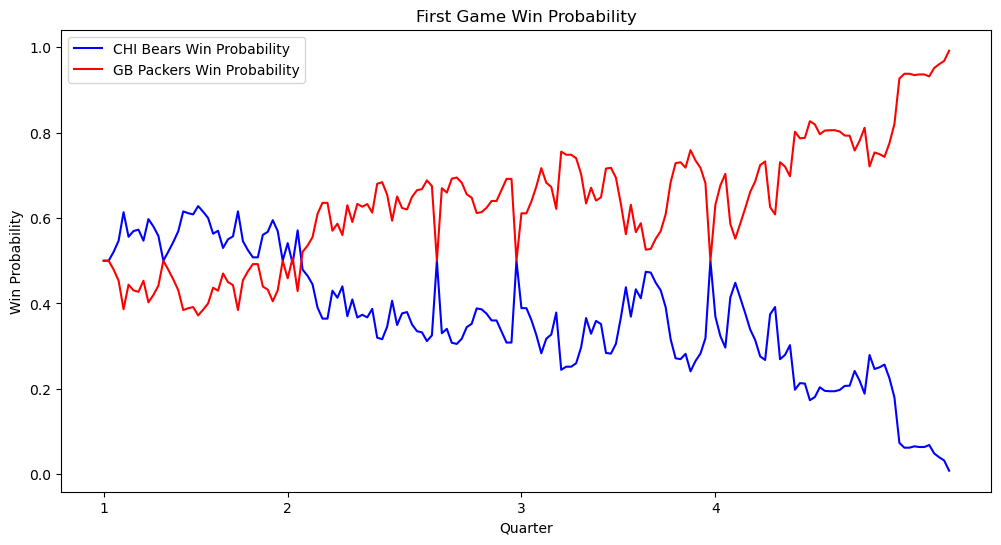

In [36]:
import matplotlib.pyplot as plt

game_one = df_reduce.iloc[:171]
plt.figure(figsize=(12, 6))

plt.plot(game_one.index, game_one['home_wp'], label='CHI Bears Win Probability', color='blue', linewidth=1.5)
plt.plot(game_one.index, game_one['away_wp'], label='GB Packers Win Probability', color='red', linewidth=1.5)

plt.xlabel('Quarter')
plt.ylabel('Win Probability')
plt.title('First Game Win Probability')
plt.legend()

quarter_ticks = game_one.groupby('qtr').apply(lambda x: x.index[0]).values
quarter_labels = game_one['qtr'].unique()
plt.xticks(ticks=quarter_ticks, labels=quarter_labels)

plt.show()